In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
genes = pd.read_csv("../../result/network_perturb_expression/valid_genes", sep="\t")
id2genes = genes.set_index("ID")["genes"].to_dict()
genes2id = genes.set_index("genes")["ID"].to_dict()
genes = genes['genes'].values

In [3]:
exp = pd.read_csv("../../data/GTEx/bulk-gex_v8_rna-seq_tpms-by-tissue_gene_tpm_2017-06-05_v8_whole_blood.gct.gz", sep="\t", skiprows=2)
exp = exp[exp["Description"].isin(genes)]
del exp['id'], exp['Name']
exp = exp.set_index("Description")
exp.index.name = None
exp_corr = exp.T.corr()

In [4]:
corr = pd.DataFrame(exp_corr.values.reshape(-1))
corr[1] = list(exp_corr.index) * exp_corr.shape[0]
corr[2] = np.repeat(list(exp_corr.index), exp_corr.shape[0])

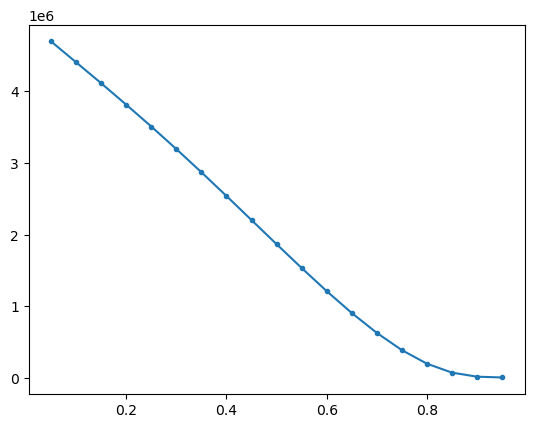

In [5]:
result = []
for ii in np.arange(0.05, 1, 0.05):
    sub_corr = corr.loc[corr[0].abs()>ii, [1, 2]] # threshold based on R2 of expression
    result.append(sub_corr.shape[0])
plt.plot(np.arange(0.05, 1, 0.05), result, ".-")

In [6]:
sub_corr = corr.loc[corr[0].abs()>0.75, [1, 2]] # threshold based on R2 of expression
sub_corr = sub_corr[sub_corr[1] != sub_corr[2]] # remove self loop

In [7]:
sub_corr[1] = sub_corr[1].map(genes2id)
sub_corr[2] = sub_corr[2].map(genes2id)

In [8]:
sub_corr.sort_values([1, 2]).to_csv("../../result/network_perturb_expression/CoExpr_GTEx_WholeBlood_0.75.tsv", sep="\t", header=False, index=False)